In [ ]:
!pip install sklearn
!pip install keras
!pip install tensorflow
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install opencv-python

In [ ]:
import os
import random
import shutil



def Train_Validation_Test_Split(df1, df2):
        '''
        Creates a folder containing two subfolders for the training, validation and testing part.
        These folders are randomly filled with the provided image data according to the specified proportions.

        Args:
                df1 (string): Name of the folder containing the original image data of the first category
                df2 (string): Name of the folder containing the original image data of the second category

        Returns:
                list_positif_training (int): List of randomly selected images for the training part of the first category
                list_negatif_training (int): List of randomly selected images for the training part of the second category
                list_positif_validation (int): List of randomly selected images for the validation part of the first category
                list_negatif_validation (int): List of randomly selected images for the validation part of the second category
                list_positif_test (int): List of randomly selected images for the test part of the first category
                list_negatif_test (int): List of randomly selected images for the test part of the second category
        '''

        # Determine the proportions of train, validation and test part
        train_part_proportion = 0.6
        validation_part_proportion = 0.2
        test_part_proportion = 0.2


        print('Final number of positif pictures:', len(os.listdir(df1)))
        print('Final number of negatif pictures:', len(os.listdir(df2)))
        print()
        print('-----------------------------------------------------------------')
        print()

        final_length_positif = len(os.listdir(df1))
        list_positif_full = list(range(1, final_length_positif+1))

        final_length_negatif = len(os.listdir(df2))
        list_negatif_full = list(range(1, final_length_negatif+1))

        print('Start to determine test, validation and train part')
        list_positif_test = random.sample(list_positif_full, round(len(list_positif_full)*test_part_proportion))
        list_remaining_positif_images = [item for item in list_positif_full if item not in list_positif_test]

        list_negatif_test = random.sample(list_negatif_full, round(len(list_negatif_full)*test_part_proportion))
        list_remaining_negatif_images = [item for item in list_negatif_full if item not in list_negatif_test]

        list_positif_validation = random.sample(list_remaining_positif_images,
                                        round(len(list_positif_full)*validation_part_proportion))


        list_negatif_validation = random.sample(list_remaining_negatif_images,
                                        round(len(list_negatif_full)*validation_part_proportion))




        list_positif_training = [item for item in list_remaining_positif_images if item not in list_positif_validation]
        list_negatif_training = [item for item in list_remaining_negatif_images if item not in list_negatif_validation]
        print('Stop to determine test, validation and train part')
        print()
        print('Start to set folder structure')
        # Get root directory
        root_directory = os.getcwd()

        # Define original datasets direction
        original_dataset_dir_positif = os.path.join(root_directory, 'positif')
        original_dataset_dir_negatif = os.path.join(root_directory, 'negatif')

        # Define base direction
        # This is the place where the image splitting
        # (train, validation, test) should take place.
        base_dir = os.path.join(root_directory, 'Model')
        os.mkdir(base_dir)


        # Define general train, validation and test direction
        train_dir = os.path.join(base_dir, 'train')
        os.mkdir(train_dir)

        validation_dir = os.path.join(base_dir, 'validation')
        os.mkdir(validation_dir)

        test_dir = os.path.join(base_dir, 'test')
        os.mkdir(test_dir)

        # Define train direction for positif
        train_positif_dir = os.path.join(train_dir, 'positif')
        os.mkdir(train_positif_dir)

        # Define train direction for negatif
        train_negatif_dir = os.path.join(train_dir, 'negatif')
        os.mkdir(train_negatif_dir)


        # Define validation direction for positif
        validation_positif_dir = os.path.join(validation_dir, 'positif')
        os.mkdir(validation_positif_dir)

        # Define validation direction for negatif
        validation_negatif_dir = os.path.join(validation_dir, 'negatif')
        os.mkdir(validation_negatif_dir)


        # Define test direction for positif
        test_positif_dir = os.path.join(test_dir, 'positif')
        os.mkdir(test_positif_dir)

        # Define test direction for negatif
        test_negatif_dir = os.path.join(test_dir, 'negatif')
        os.mkdir(test_negatif_dir)


        print('Stop to set folder structure')
        print()

        print('Start copying the determined images to the appropriate folders')
        fnames = ['Positif{}.jpg'.format(i) for i in list_positif_training]
        for fname in fnames:
                src = os.path.join(original_dataset_dir_positif, fname)
                dst = os.path.join(train_positif_dir, fname)
                shutil.copyfile(src, dst)

        fnames = ['Negatif{}.jpg'.format(i) for i in list_negatif_training]
        for fname in fnames:
                src = os.path.join(original_dataset_dir_negatif, fname)
                dst = os.path.join(train_negatif_dir, fname)
                shutil.copyfile(src, dst)

        fnames = ['Positif{}.jpg'.format(i) for i in list_positif_validation]
        for fname in fnames:
                src = os.path.join(original_dataset_dir_positif, fname)
                dst = os.path.join(validation_positif_dir, fname)
                shutil.copyfile(src, dst)

        fnames = ['Negatif{}.jpg'.format(i) for i in list_negatif_validation]
        for fname in fnames:
                src = os.path.join(original_dataset_dir_negatif, fname)
                dst = os.path.join(validation_negatif_dir, fname)
                shutil.copyfile(src, dst)

        fnames = ['Positif{}.jpg'.format(i) for i in list_positif_test]
        for fname in fnames:
                src = os.path.join(original_dataset_dir_positif, fname)
                dst = os.path.join(test_positif_dir, fname)
                shutil.copyfile(src, dst)

        fnames = ['Negatif{}.jpg'.format(i) for i in list_negatif_test]
        for fname in fnames:
                src = os.path.join(original_dataset_dir_negatif, fname)
                dst = os.path.join(test_negatif_dir, fname)
                shutil.copyfile(src, dst)


        print('Stop copying the determined images to the appropriate folders')
        print()
        print('-----------------------------------------------------------------')
        print()
        print('          The final data breakdown is as follows:')
        print()
        print('Total training positif images:', len(os.listdir(train_positif_dir)))
        print('Total training negatif images:', len(os.listdir(train_negatif_dir)))
        print()
        print('Total validation positif images:', len(os.listdir(validation_positif_dir)))
        print('Total validation negatif images:', len(os.listdir(validation_negatif_dir)))
        print()
        print('Total test positif images:', len(os.listdir(test_positif_dir)))
        print('Total test negatif images:', len(os.listdir(test_negatif_dir)))

        return  list_positif_training, list_negatif_training,  \
                list_positif_validation, list_negatif_validation, \
                list_positif_test, list_negatif_test

In [ ]:
from preprocessing_multi_CNN import Train_Validation_Test_Split

import numpy as np
import pandas as pd

import os
import shutil

import pickle as pk

import cv2
import matplotlib.pyplot as plt
%matplotlib inline

from keras import layers
from keras import models
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model

from keras.applications import VGG19

dir = '/content/drive/MyDrive/Computer Vision'
positif_train, negatif_train, \
positif_val, negatif_val, \
positif_test, negatif_test = Train_Validation_Test_Split('Positif', 'Negatif')

list_positif_training = positif_train
list_negatif_training = negatif_train

list_positif_validation = positif_val
list_negatif_validation = negatif_val

list_positif_test = positif_test
list_negatif_test = negatif_test


root_directory = os.getcwd()

train_dir = os.path.join(root_directory, 'Model\\train')
validation_dir = os.path.join(root_directory, 'Model\\validation')
test_dir = os.path.join(root_directory, 'Model\\test')


num_positif_img_train = len(list_positif_training)
num_negatif_img_train = len(list_negatif_training)

num_train_images_total = num_positif_img_train + num_negatif_img_train

print('Total training positif images: ' + str(num_positif_img_train))
print('Total training negatif images: ' + str(num_negatif_img_train))
print()
print('Total training images: ' + str(num_train_images_total))


num_positif_img_validation = len(list_positif_validation)
num_negatif_img_validation = len(list_negatif_validation)


num_validation_images_total = num_positif_img_validation + num_negatif_img_validation

print('Total validation positif images: ' + str(num_positif_img_validation))
print('Total validation negatif images: ' + str(num_negatif_img_validation))
print()
print('Total validation images: ' + str(num_validation_images_total))


num_positif_img_test = len(list_positif_test)
num_negatif_img_test = len(list_negatif_test)


num_test_images_total = num_positif_img_test + num_negatif_img_test

print('Total test positif images: ' + str(num_positif_img_test))
print('Total test negatif images: ' + str(num_negatif_img_test))
print()
print('Total test images: ' + str(num_test_images_total))


Final number of positif pictures: 800
Final number of negatif pictures: 1000

-----------------------------------------------------------------

Start to determine test, validation and train part
Stop to determine test, validation and train part

Start to set folder structure
Stop to set folder structure

Start copying the determined images to the appropriate folders
Stop copying the determined images to the appropriate folders

-----------------------------------------------------------------

          The final data breakdown is as follows:

Total training positif images: 480
Total training negatif images: 600

Total validation positif images: 160
Total validation negatif images: 200

Total test positif images: 160
Total test negatif images: 200
Total training positif images: 480
Total training negatif images: 600

Total training images: 1080
Total validation positif images: 160
Total validation negatif images: 200

Total validation images: 360
Total test positif images: 160
Total t

In [ ]:
checkpoint_no = 'ckpt_1_CNN_with_TF_VGG19_with_DataAug'
model_name = 'Covid_CNN_TF_VGG19_epoch_30_ES'


img_height = 150
img_width = 150
input_shape = (img_height, img_width, 3)

n_batch_size = 32

n_steps_per_epoch = int(num_train_images_total / n_batch_size)
n_validation_steps = int(num_validation_images_total / n_batch_size)
n_test_steps = int(num_test_images_total / n_batch_size)

n_epochs = 50

num_classes = len(os.listdir(train_dir))

print('Input Shape: '+'('+str(img_height)+', '+str(img_width)+', ' + str(3)+')')
print('Batch Size: ' + str(n_batch_size))
print()
print('Steps per Epoch: ' + str(n_steps_per_epoch))
print()
print('Validation Steps: ' + str(n_validation_steps))
print('Test Steps: ' + str(n_test_steps))
print()
print('Number of Epochs: ' + str(n_epochs))
print()
print('Number of Classes: ' + str(num_classes))


VGG19_base = VGG19(weights='imagenet',
                  include_top=False,
                  input_shape=input_shape)

conv_base = VGG19_base


conv_base.summary()

Input Shape: (150, 150, 3)
Batch Size: 32

Steps per Epoch: 33

Validation Steps: 11
Test Steps: 11

Number of Epochs: 50

Number of Classes: 2
Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128) 

In [ ]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))


model.summary()


print('Number of trainable weights before freezing the conv base:', len(model.trainable_weights))


conv_base.trainable = False

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(num_classes, activation='softmax'))


model.summary()


print('Number of trainable weights after freezing the conv base:', len(model.trainable_weights))

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dense (Dense)               (None, 256)               2097408   
                                                                 
 dense_1 (Dense)             (None, 2)                 514       
                                                                 
Total params: 22,122,306
Trainable params: 22,122,306
Non-trainable params: 0
_________________________________________________________________
Number of trainable weights before freezing the conv base: 36
Model: "sequential_1"
_________________________________________________________________
 Layer (type)             

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])


train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

validation_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=(img_height, img_width),
        batch_size=n_batch_size,
        class_mode='categorical')


validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(img_height, img_width),
        batch_size=n_batch_size,
        class_mode='categorical')


# Prepare a directory to store all the checkpoints.
checkpoint_dir = checkpoint_no
if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)


keras_callbacks = [ModelCheckpoint(filepath = checkpoint_dir,
                                   monitor='val_loss', save_best_only=True, mode='auto')]
                   #EarlyStopping(monitor='val_loss', patience=5, mode='auto',
                                 #min_delta = 0, verbose=1)]


history = model.fit(
      train_generator,
      steps_per_epoch=n_steps_per_epoch,
      epochs=n_epochs,
      validation_data=validation_generator,
      validation_steps=n_validation_steps,
      callbacks=keras_callbacks)


hist_df = pd.DataFrame(history.history)
hist_df['epoch'] = hist_df.index + 1
cols = list(hist_df.columns)
cols = [cols[-1]] + cols[:-1]
hist_df = hist_df[cols]
hist_df.to_csv(checkpoint_no + '/' + 'history_df_' + model_name + '.csv')
hist_df.head()


values_of_best_model = hist_df[hist_df.val_loss == hist_df.val_loss.min()]
values_of_best_model

Found 1080 images belonging to 2 classes.
Found 360 images belonging to 2 classes.
Epoch 1/50
33/33 [==============================] - ETA: 0s - loss: 0.7809 - accuracy: 0.7347

INFO:tensorflow:Assets written to: ckpt_1_CNN_with_TF_VGG19_with_DataAug\assets


INFO:tensorflow:Assets written to: ckpt_1_CNN_with_TF_VGG19_with_DataAug\assets


33/33 [==============================] - 63s 2s/step - loss: 0.7809 - accuracy: 0.7347 - val_loss: 0.3456 - val_accuracy: 0.8381
Epoch 2/50
33/33 [==============================] - ETA: 0s - loss: 0.4119 - accuracy: 0.8101

INFO:tensorflow:Assets written to: ckpt_1_CNN_with_TF_VGG19_with_DataAug\assets


INFO:tensorflow:Assets written to: ckpt_1_CNN_with_TF_VGG19_with_DataAug\assets


33/33 [==============================] - 59s 2s/step - loss: 0.4119 - accuracy: 0.8101 - val_loss: 0.3265 - val_accuracy: 0.8551
Epoch 3/50
33/33 [==============================] - ETA: 0s - loss: 0.3728 - accuracy: 0.8454

INFO:tensorflow:Assets written to: ckpt_1_CNN_with_TF_VGG19_with_DataAug\assets


INFO:tensorflow:Assets written to: ckpt_1_CNN_with_TF_VGG19_with_DataAug\assets


33/33 [==============================] - 59s 2s/step - loss: 0.3728 - accuracy: 0.8454 - val_loss: 0.3093 - val_accuracy: 0.8636
Epoch 4/50
33/33 [==============================] - 56s 2s/step - loss: 0.3497 - accuracy: 0.8483 - val_loss: 0.3097 - val_accuracy: 0.8636
Epoch 5/50
33/33 [==============================] - 57s 2s/step - loss: 0.3655 - accuracy: 0.8416 - val_loss: 0.3102 - val_accuracy: 0.8608
Epoch 6/50
33/33 [==============================] - ETA: 0s - loss: 0.3535 - accuracy: 0.8511

INFO:tensorflow:Assets written to: ckpt_1_CNN_with_TF_VGG19_with_DataAug\assets


INFO:tensorflow:Assets written to: ckpt_1_CNN_with_TF_VGG19_with_DataAug\assets


33/33 [==============================] - 59s 2s/step - loss: 0.3535 - accuracy: 0.8511 - val_loss: 0.2987 - val_accuracy: 0.8778
Epoch 7/50
33/33 [==============================] - 55s 2s/step - loss: 0.3451 - accuracy: 0.8569 - val_loss: 0.4179 - val_accuracy: 0.8267
Epoch 8/50
33/33 [==============================] - ETA: 0s - loss: 0.3537 - accuracy: 0.8492

INFO:tensorflow:Assets written to: ckpt_1_CNN_with_TF_VGG19_with_DataAug\assets


INFO:tensorflow:Assets written to: ckpt_1_CNN_with_TF_VGG19_with_DataAug\assets


33/33 [==============================] - 58s 2s/step - loss: 0.3537 - accuracy: 0.8492 - val_loss: 0.2861 - val_accuracy: 0.8750
Epoch 9/50
33/33 [==============================] - 57s 2s/step - loss: 0.3666 - accuracy: 0.8330 - val_loss: 0.2910 - val_accuracy: 0.8835
Epoch 10/50
33/33 [==============================] - 57s 2s/step - loss: 0.3500 - accuracy: 0.8464 - val_loss: 0.2912 - val_accuracy: 0.8693
Epoch 11/50
33/33 [==============================] - 58s 2s/step - loss: 0.3430 - accuracy: 0.8551 - val_loss: 0.3878 - val_accuracy: 0.8068
Epoch 12/50
33/33 [==============================] - ETA: 0s - loss: 0.3573 - accuracy: 0.8416

INFO:tensorflow:Assets written to: ckpt_1_CNN_with_TF_VGG19_with_DataAug\assets


INFO:tensorflow:Assets written to: ckpt_1_CNN_with_TF_VGG19_with_DataAug\assets


33/33 [==============================] - 58s 2s/step - loss: 0.3573 - accuracy: 0.8416 - val_loss: 0.2805 - val_accuracy: 0.8722
Epoch 13/50
33/33 [==============================] - 53s 2s/step - loss: 0.3423 - accuracy: 0.8426 - val_loss: 0.2860 - val_accuracy: 0.8636
Epoch 14/50
33/33 [==============================] - 53s 2s/step - loss: 0.3321 - accuracy: 0.8540 - val_loss: 0.3842 - val_accuracy: 0.8182
Epoch 15/50
33/33 [==============================] - 53s 2s/step - loss: 0.3151 - accuracy: 0.8483 - val_loss: 0.4697 - val_accuracy: 0.7727
Epoch 16/50
33/33 [==============================] - 53s 2s/step - loss: 0.3422 - accuracy: 0.8502 - val_loss: 0.3622 - val_accuracy: 0.8267
Epoch 17/50
33/33 [==============================] - 56s 2s/step - loss: 0.3495 - accuracy: 0.8511 - val_loss: 0.3517 - val_accuracy: 0.8352
Epoch 18/50
33/33 [==============================] - ETA: 0s - loss: 0.3129 - accuracy: 0.8674

INFO:tensorflow:Assets written to: ckpt_1_CNN_with_TF_VGG19_with_DataAug\assets


INFO:tensorflow:Assets written to: ckpt_1_CNN_with_TF_VGG19_with_DataAug\assets


33/33 [==============================] - 59s 2s/step - loss: 0.3129 - accuracy: 0.8674 - val_loss: 0.2713 - val_accuracy: 0.8835
Epoch 19/50
33/33 [==============================] - ETA: 0s - loss: 0.3278 - accuracy: 0.8626

INFO:tensorflow:Assets written to: ckpt_1_CNN_with_TF_VGG19_with_DataAug\assets


INFO:tensorflow:Assets written to: ckpt_1_CNN_with_TF_VGG19_with_DataAug\assets


33/33 [==============================] - 56s 2s/step - loss: 0.3278 - accuracy: 0.8626 - val_loss: 0.2570 - val_accuracy: 0.8835
Epoch 20/50
33/33 [==============================] - 53s 2s/step - loss: 0.3215 - accuracy: 0.8531 - val_loss: 0.2960 - val_accuracy: 0.8608
Epoch 21/50
33/33 [==============================] - 68s 2s/step - loss: 0.3039 - accuracy: 0.8693 - val_loss: 0.3121 - val_accuracy: 0.8636
Epoch 22/50
33/33 [==============================] - 63s 2s/step - loss: 0.3225 - accuracy: 0.8550 - val_loss: 0.2706 - val_accuracy: 0.8835
Epoch 23/50
33/33 [==============================] - 65s 2s/step - loss: 0.3080 - accuracy: 0.8616 - val_loss: 0.2787 - val_accuracy: 0.8750
Epoch 24/50
33/33 [==============================] - 62s 2s/step - loss: 0.3281 - accuracy: 0.8550 - val_loss: 0.3737 - val_accuracy: 0.8324
Epoch 25/50
33/33 [==============================] - 59s 2s/step - loss: 0.3102 - accuracy: 0.8626 - val_loss: 0.2815 - val_accuracy: 0.8665
Epoch 26/50
33/33 [======

INFO:tensorflow:Assets written to: ckpt_1_CNN_with_TF_VGG19_with_DataAug\assets


INFO:tensorflow:Assets written to: ckpt_1_CNN_with_TF_VGG19_with_DataAug\assets


33/33 [==============================] - 63s 2s/step - loss: 0.2952 - accuracy: 0.8674 - val_loss: 0.2485 - val_accuracy: 0.8920
Epoch 49/50
33/33 [==============================] - 57s 2s/step - loss: 0.2768 - accuracy: 0.8817 - val_loss: 0.3388 - val_accuracy: 0.8295
Epoch 50/50
33/33 [==============================] - 59s 2s/step - loss: 0.3028 - accuracy: 0.8664 - val_loss: 0.2594 - val_accuracy: 0.8892


,epoch,loss,accuracy,val_loss,val_accuracy
47,48,0.295205,0.867366,0.24846,0.892045


Class assignment: {'negatif': 0, 'positif': 1}


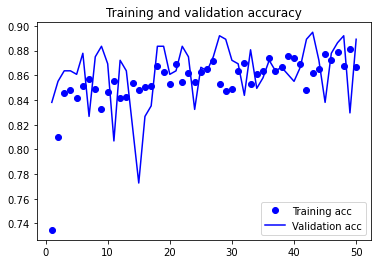

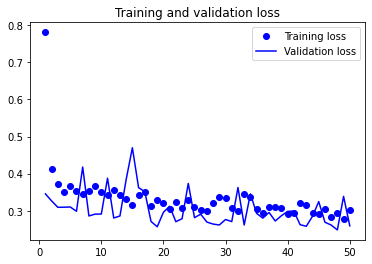

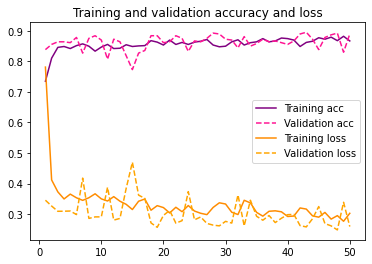

In [ ]:
class_assignment = train_generator.class_indices

df = pd.DataFrame([class_assignment], columns=class_assignment.keys())
df_stacked = df.stack()
df_temp = pd.DataFrame(df_stacked).reset_index().drop(['level_0'], axis=1)
df_temp.columns = ['Category', 'Allocated Number']
df_temp.to_csv(checkpoint_no + '/' + 'class_assignment_df_' + model_name + '.csv')

print('Class assignment:', str(class_assignment))


acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.figure()

plt.plot(epochs, acc, 'purple', label='Training acc')
plt.plot(epochs, val_acc, 'deeppink', linestyle='--', label='Validation acc')
plt.plot(epochs, loss, 'darkorange', label='Training loss')
plt.plot(epochs, val_loss, 'orange', linestyle='--', label='Validation loss')
plt.title('Training and validation accuracy and loss')
plt.legend()

plt.show()

In [ ]:
# Loading the automatically saved model
model_reloaded = load_model(checkpoint_no)

# Saving the best model in the correct path and format
root_directory = os.getcwd()
checkpoint_dir = os.path.join(root_directory, checkpoint_no)
model_name_temp = os.path.join(checkpoint_dir, model_name + '.h5')
model_reloaded.save(model_name_temp)

# Deletion of the automatically created folders/.pb file under Model Checkpoint File.
folder_name_temp1 = os.path.join(checkpoint_dir, 'assets')
folder_name_temp2 = os.path.join(checkpoint_dir, 'variables')
file_name_temp = os.path.join(checkpoint_dir, 'saved_model.pb')

shutil.move(file_name_temp, folder_name_temp1)
shutil.rmtree(folder_name_temp1, ignore_errors=True)
shutil.rmtree(folder_name_temp2, ignore_errors=True)

In [ ]:
best_model = load_model(model_name_temp)

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_height, img_width),
        batch_size=n_batch_size,
        class_mode='categorical')

test_loss, test_acc = best_model.evaluate(test_generator, steps=n_test_steps)
print()
print('Test Accuracy:', test_acc)

pk.dump(img_height, open(checkpoint_dir+ '\\' +'img_height.pkl', 'wb'))
pk.dump(img_width, open(checkpoint_dir+ '\\' +'img_width.pkl', 'wb'))

Found 360 images belonging to 2 classes.
11/11 [==============================] - 16s 1s/step - loss: 0.2496 - accuracy: 0.8920

Test Accuracy: 0.8920454382896423


In [ ]:
# Determine Checkpoint Dir
checkpoint_dir = 'ckpt_1_CNN_with_TF_VGG19_with_DataAug'

# Load best model
best_model = load_model(checkpoint_dir + '/' + 'Covid_CNN_TF_VGG19_epoch_30_ES.h5')

# Load the categories
df = pd.read_csv(checkpoint_dir + '/' + 'class_assignment_df_Covid_CNN_TF_VGG19_epoch_30_ES.csv')
df = df.sort_values(by='Allocated Number', ascending=True)
CATEGORIES = df['Category'].to_list()


# Load the used image height and width
img_height_reload = pk.load(open(checkpoint_dir + '/' + 'img_height.pkl','rb'))
img_width_reload = pk.load(open(checkpoint_dir + '/' + 'img_width.pkl','rb'))


print('Model Summary :' + str(best_model.summary()))
print()
print()
print('CATEGORIES : ' + str(CATEGORIES))
print()
print('Used image height: ' + str(img_height_reload))
print('Used image width: ' + str(img_width_reload))

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 4, 4, 512)         20024384  
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                                 
 dense_2 (Dense)             (None, 256)               2097408   
                                                                 
 dense_3 (Dense)             (None, 2)                 514       
                                                                 
Total params: 22,122,306
Trainable params: 2,097,922
Non-trainable params: 20,024,384
_________________________________________________________________
Model Summary :None


CATEGORIES : ['negatif', 'positif']

Used image height: 150
Used image width: 150


AxesImage(54,36;334.8x217.44)
1/1 [==============================] - 0s 251ms/step

------------------------------------
Predicted Class: negatif
------------------------------------


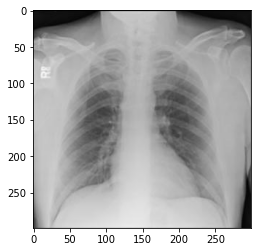

In [ ]:
img_pred = cv2.imread('C:/Users/mahdi/Computer Vision Deteksi Covid-19/Testing/NORMAL-TEST1.JPG')

print(plt.imshow(cv2.cvtColor(img_pred, cv2.COLOR_BGR2RGB)))

img_pred = cv2.resize(img_pred,(img_height_reload,img_width_reload))
img_pred = np.reshape(img_pred,[1,img_height_reload,img_width_reload,3])

classes = np.argmax(best_model.predict(img_pred), axis=-1)

print()
print('------------------------------------')
print('Predicted Class: ' + CATEGORIES[int(classes[0])])
print('------------------------------------')